In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


DATA CLEANING

In [5]:
data[(data["slope"] < 1) | (data["slope"] > 3)]

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [6]:
data["slope"] = data["slope"].replace(0, np.nan)

data["slope"] = data["slope"].fillna(data["slope"].median())

In [7]:
data["slope"].isna().sum()

0

In [8]:
data["serumcholestrol"] = data["serumcholestrol"].replace(0, np.nan)

data["serumcholestrol"] = data["serumcholestrol"].interpolate(method="linear")


data["serumcholestrol"] = data["serumcholestrol"].fillna(data["serumcholestrol"].median())

In [9]:
data["serumcholestrol"].isna().sum()

0

**DATA ANALYSIS** 

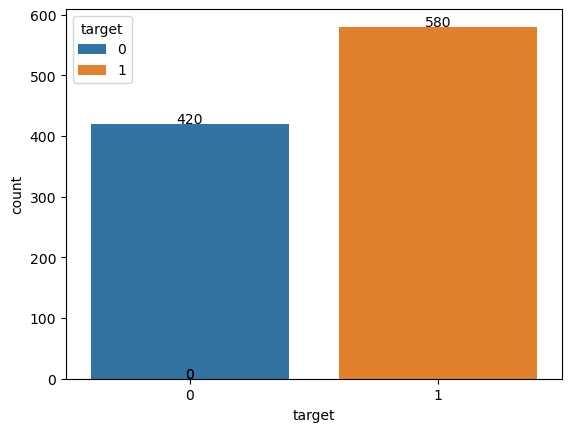

In [10]:
# distribution of target value
ax = sns.countplot(data, x = "target", hue = "target", stat = "count")

for value in ax.patches:
    height = value.get_height()
    ax.text(value.get_x() + value.get_width() / 2 , height + 0.5, '{:1.0f}'.format(height), ha = "center")
plt.show()

In [11]:
data = data.drop(columns=["patientid"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   float64
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   float64
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 101.7 KB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
target = 'target'

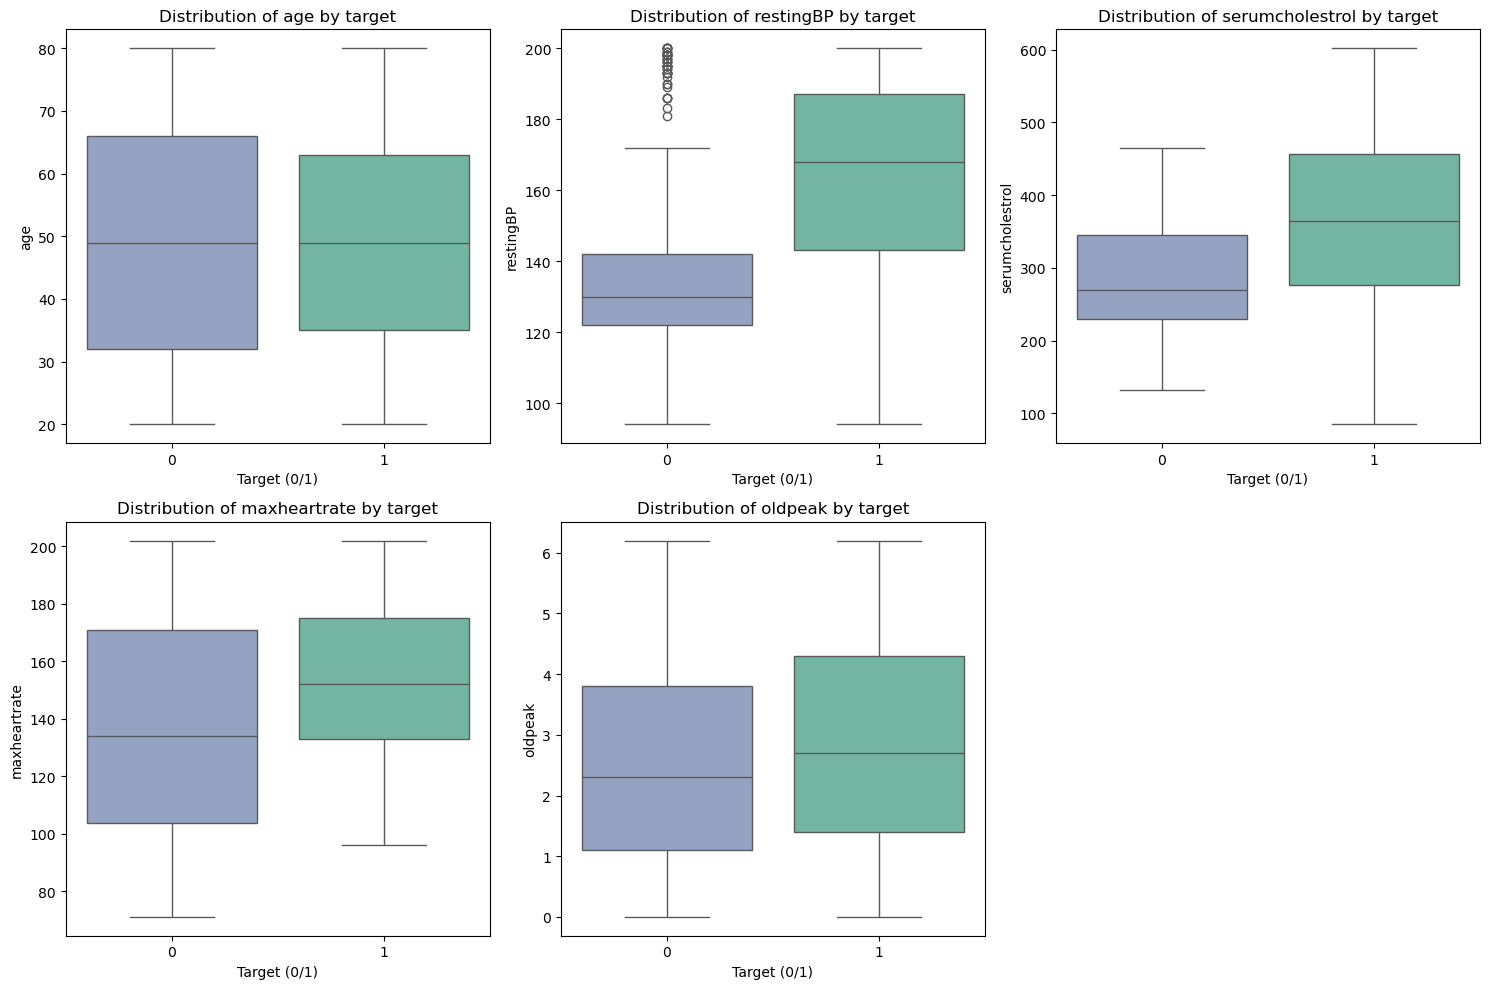

In [25]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=data, palette={1: "#66c2a5", 0: "#8da0cb"}, hue=target, legend=False)
    
    plt.title(f'Distribution of {feature} by target', fontsize=12)
    plt.xlabel('Target (0/1)', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
1. Age
No outliers for either target group.
Action: No scaling or cleaning required.

2. RestingBP
Many outliers for target = 0 (high blood pressure values above the upper whisker).
These are likely real high-BP cases, not data errors.
Effect: Important signal for classification; should not be removed.
Action: Use RobustScaler for SVM/KNN models if scaling is required.

3. Serum Cholesterol
No formal outliers, but the distribution has a long upper tail.
Effect: May cause issues for StandardScaler but not a data-quality problem.
Action: Use RobustScaler for SVM/KNN/NN models if scaling is required.

4. Max Heart Rate
No outliers, only wide spread.
Action: No cleaning needed.

5. Oldpeak
No outliers, moderate skew.
Action: Use RobustScaler for SVM/KNN/NN models if scaling is required.

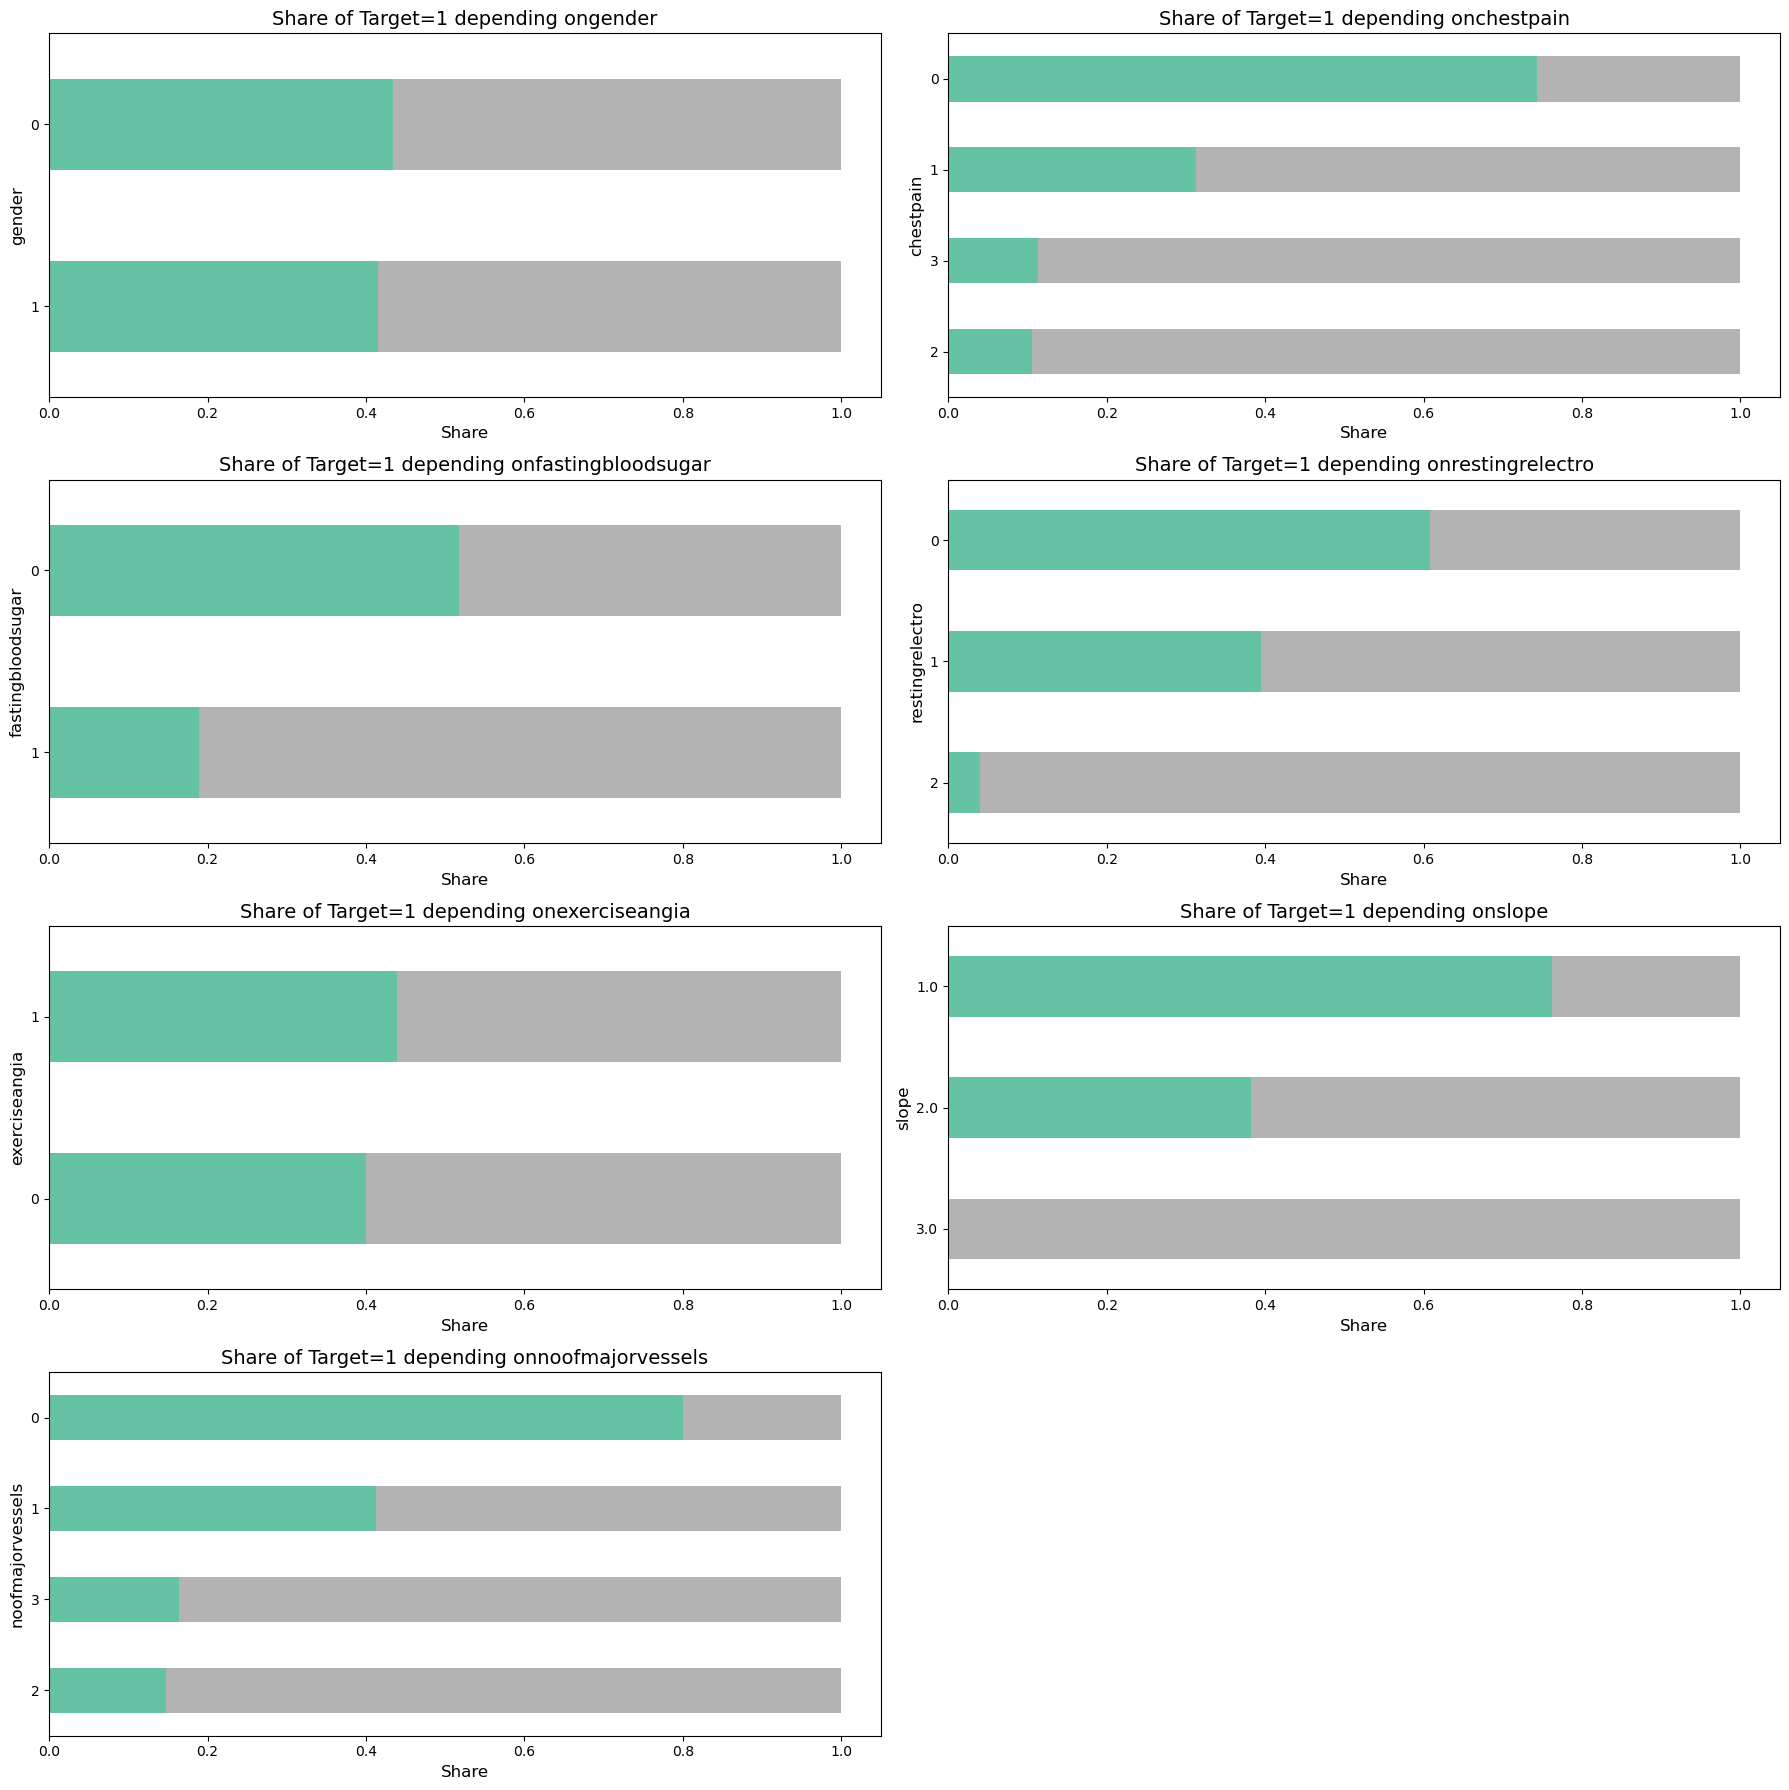

In [23]:
plt.figure(figsize=(18, 18))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    
    counts = data.groupby([feature, target]).size().unstack(fill_value=0)
    
    totals = counts.sum(axis=1)
    proportions = counts.div(totals, axis=0)

    proportions_sorted = proportions.sort_values(by=1, ascending=False)
    proportions_sorted.plot(kind='barh', stacked=True, cmap='Set2', ax=plt.gca())
    
    plt.title(f'Share of Target=1 depending on{feature}', fontsize=14)
    plt.xlabel('Share', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

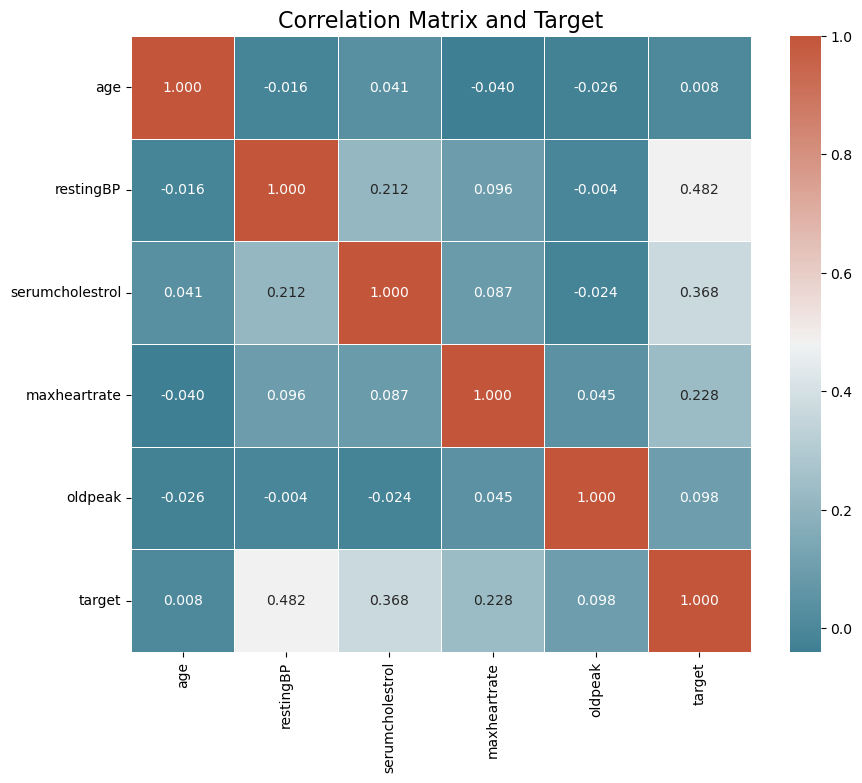

In [27]:
features_for_corr = [
    'age', 
    'restingBP', 
    'serumcholestrol', 
    'maxheartrate', 
    'oldpeak', 
    'target'
]

correlation_matrix = data[features_for_corr].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap=cmap,    
    fmt=".3f",          
    linewidths=.5,      
    cbar=True           
)

plt.title('Correlation Matrix and Target', fontsize=16)
plt.show()

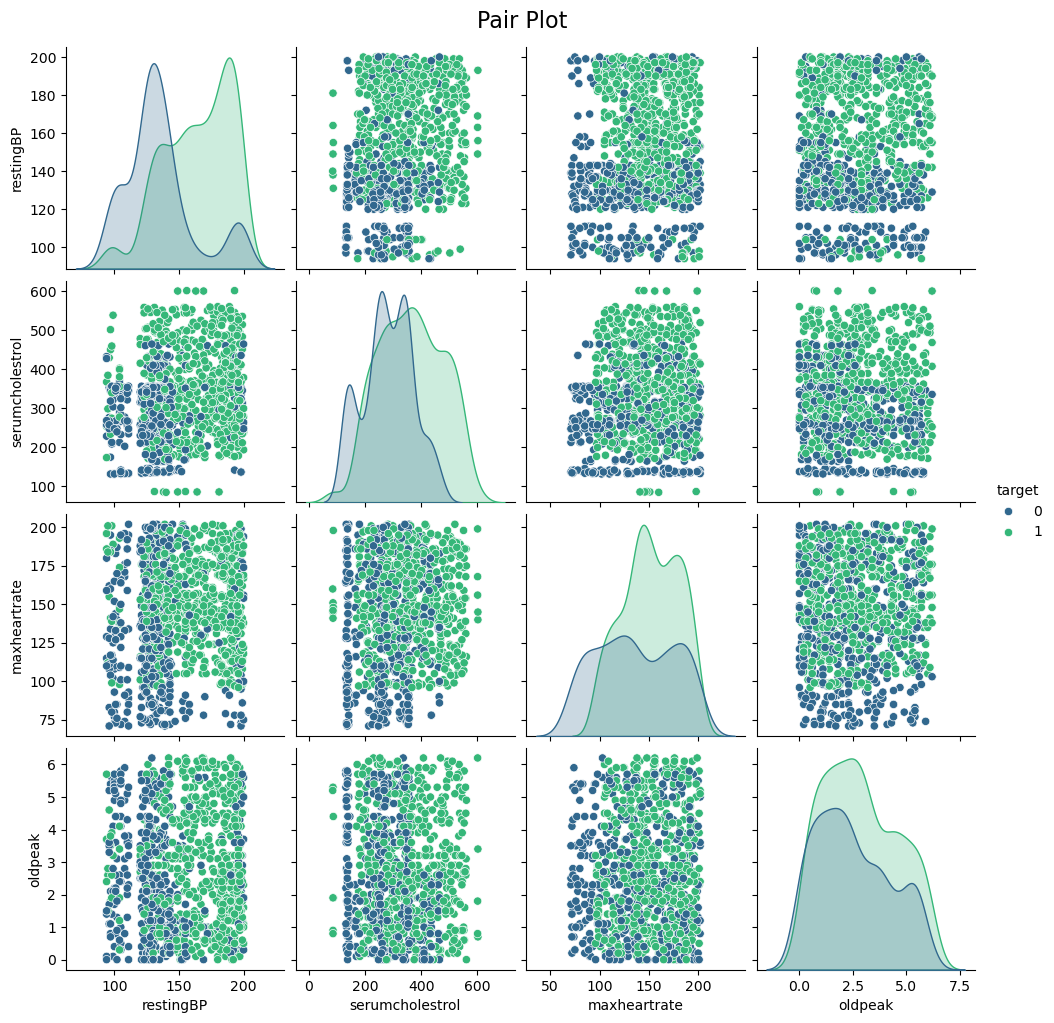

In [29]:
strong_numerical_features = [
    'restingBP',
    'serumcholestrol',
    'maxheartrate',
    'oldpeak',
    'target'
]
sns.pairplot(
    data[strong_numerical_features],
    hue='target',
    palette='viridis',
    diag_kind='kde'
)

plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

In [30]:
# убираю выбросы из первых вузуализаций смотрим боксплоты
outlier_features = ['restingBP', 'serumcholestrol']
for feature in outlier_features:
    upper_bound = data[feature].quantile(0.99)
    data[feature] = np.where(
        data[feature] > upper_bound,
        upper_bound,
        data[feature]
    )

In [31]:
# убираю скошенность
skewed_features = ['restingBP', 'serumcholestrol'] 

for feature in skewed_features:
    data[feature] = np.log(data[feature])

In [32]:
# Для номинальных сделаем one hot encoding
ohe_features = ['gender', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia']
ordinal_features = ['chestpain', 'slope', 'noofmajorvessels']
data = pd.get_dummies(data, columns=ohe_features, drop_first=True)